#Setting Up Environment

In [1]:
# File System uploaded directly into Collab
import pandas as pd
file = ('/content/walmart.csv')

df = pd.read_csv(file)




In [2]:
# Use this block to rename variables to more readable forms


df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',
                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

# Linear Regression Model

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# Label Encoding
for column in changedX.select_dtypes(include=['object']).columns:
    changedX[column] = pd.Categorical(changedX[column]).codes



#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(changedX, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)




# MinMaxScaler
scaler = MinMaxScaler()
changedX_train = scaler.fit_transform(changedX_train)  # call fittransform on training data only
changedX_val = scaler.transform(changedX_val) # use transform on val and test sets to avoid leaking information
changedX_test = scaler.transform(changedX_test)


# Linear Regression
lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)



print("Linear Regression Label Encoding Metrics For Sales Target using MinMaxScaler:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Label Encoding Metrics For Sales Target using MinMaxScaler:
MSE: 22074202.01808073
R^2 Score: 0.12054821880925315


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap


#Split
changedX_temp, changedX_test, y_temp, y_test = train_test_split(changedX, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)



#MinMaxScaler
scaler = StandardScaler()
changedX_train = scaler.fit_transform(changedX_train)
changedX_val = scaler.transform(changedX_val)
changedX_test = scaler.transform(changedX_test)


lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Linear Regression Metrics using StandardScaler:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)


Linear Regression Metrics using StandardScaler:
MSE: 22062071.263333105
R^2 Score: 0.12103151663633871


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap



#Split
changedX_temp, changedX_test, y_temp, y_test = train_test_split(changedX, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)


#RobustScaler
scaler = RobustScaler()
changedX_train = scaler.fit_transform(changedX_train)
changedX_val = scaler.transform(changedX_val)
changedX_test = scaler.transform(changedX_test)




lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Linear Regression Metrics using RobustScaler:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

Linear Regression Metrics using RobustScaler:
MSE: 22062071.263333105
R^2 Score: 0.12103151663633871


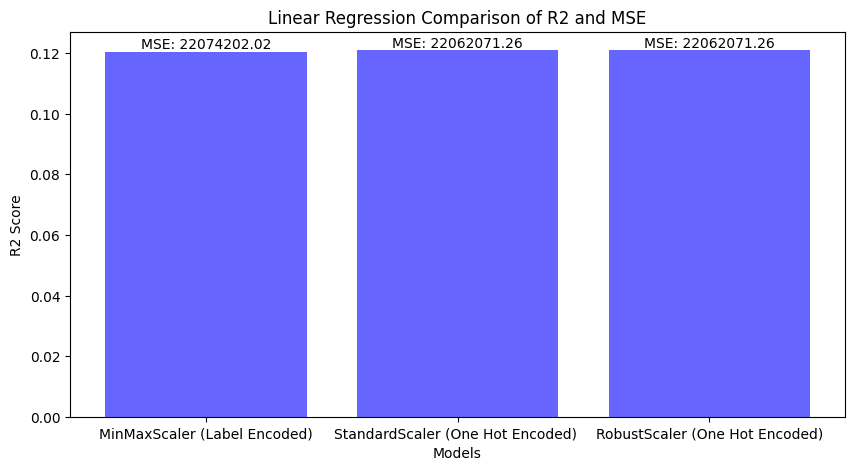

In [6]:
import matplotlib.pyplot as plt

models = ["MinMaxScaler (Label Encoded)", "StandardScaler (One Hot Encoded) ", "RobustScaler (One Hot Encoded)"]
mse = [22074202.01808073, 22062071.263333105, 22062071.263333105]
r2 = [0.12054821880925315, 0.12103151663633871, 0.12103151663633871]

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(models, r2, color='b', alpha=0.6)

for bar, mse_value in zip(bars, mse):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'MSE: { mse_value:.2f}',
            verticalalignment='bottom', ha='center')


ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Linear Regression Comparison of R2 and MSE')
plt.show()


# PCA Linear Regression

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap



#Split
changedX_temp, changedX_test, y_temp, y_test = train_test_split(changedX, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)


#RobustScaler
scaler = RobustScaler()
changedX_train = scaler.fit_transform(changedX_train)
changedX_val = scaler.transform(changedX_val)
changedX_test = scaler.transform(changedX_test)

#PCA
pca = PCA(n_components=0.95, random_state=42)
changedX_train = pca.fit_transform(changedX_train)
changedX_val = pca.transform(changedX_val) # val set
changedX_test = pca.transform(changedX_test) # Test set#



lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)

# Val Set
val_predictions = lr_model.predict(changedX_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)


#Test Set
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Validation Metrics:")
print("MSE:", val_mse)
print("R^2 Score:", val_r2)
print()
print("Linear Regression Metrics using PCA and RobustScaler:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)
print()
#print(f"Original number of features: {changedX_train.shape[1]}")
print(f"Reduced number of features: {pca.n_components_}")



Validation Metrics:
MSE: 22164931.83028695
R^2 Score: 0.1229215693648914

Linear Regression Metrics using PCA and RobustScaler:
MSE: 22071938.812738545
R^2 Score: 0.12063838650671987

Reduced number of features: 13


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


changedX = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum']

# One-hot encode
changedX = pd.get_dummies(changedX, drop_first=True)  # drop_first to avoid dummy variable trap


#Split
changedX_temp, changedX_test, y_temp, y_test = train_test_split(changedX, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)



#Standard Scaler
scaler = StandardScaler()
changedX_train = scaler.fit_transform(changedX_train)
changedX_val = scaler.transform(changedX_val)
changedX_test = scaler.transform(changedX_test)


#PCA
pca = PCA(n_components=0.95, random_state=42)
changedX_train = pca.fit_transform(changedX_train)
changedX_val = pca.transform(changedX_val) # val set
changedX_test = pca.transform(changedX_test) # Test set



lr_model = LinearRegression()
lr_model.fit(changedX_train, y_train)

# Val Set
val_predictions = lr_model.predict(changedX_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)


#Test Set
predictions_lr = lr_model.predict(changedX_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
r2_lr = r2_score(y_test, predictions_lr)

print("Validation Metrics:")
print("MSE:", val_mse)
print("R^2 Score:", val_r2)
print()
print("Linear Regression Metrics using PCA and Standard:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)
print()
print(f"Original number of features: {changedX_train.shape[1]}")
print(f"Reduced number of features: {pca.n_components_}")


Validation Metrics:
MSE: 22182358.77109022
R^2 Score: 0.12223197582102041

Linear Regression Metrics using PCA and Standard:
MSE: 22093584.581663217
R^2 Score: 0.11977600380221909

Original number of features: 13
Reduced number of features: 13


# Best Logistic Regression Models from Testing

In [13]:
## Using Median MinMax Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].median()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(XLogisticRegression, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)

model = LogisticRegression(max_iter=1000)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(changedX_train)
X_test = scaler.transform(changedX_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.639
Precision: 0.639
Recall: 0.639
F1 Score: 0.639
Confusion Matrix:
 [[17058 10475]
 [ 9386 18088]]
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.62      0.63     27533
        True       0.63      0.66      0.65     27474

    accuracy                           0.64     55007
   macro avg       0.64      0.64      0.64     55007
weighted avg       0.64      0.64      0.64     55007



In [14]:
## Using Mean Standard Scaler

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()


# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap

#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(XLogisticRegression, y, test_size=0.1, random_state=42)

#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)

model = LogisticRegression(max_iter=1000)

#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(changedX_train)
X_test = scaler.transform(changedX_test)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.787
Precision : 0.788
Recall: 0.787
F1 Score: 0.781
Confusion Matrix:
 [[29745  3433]
 [ 8285 13544]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     33178
        True       0.80      0.62      0.70     21829

    accuracy                           0.79     55007
   macro avg       0.79      0.76      0.77     55007
weighted avg       0.79      0.79      0.78     55007



# PCA Logistic Regression

In [15]:
## Using Mean Standard Scaler with PCA

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending


# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap

#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(XLogisticRegression, y, test_size=0.1, random_state=42)

#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)


#scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(changedX_train)
X_val = scaler.transform(changedX_val)
X_test = scaler.transform(changedX_test)


#PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)

X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)



# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Eval
intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.788
Precision : 0.789
Recall: 0.788
F1 Score: 0.782
Confusion Matrix:
 [[29752  3426]
 [ 8262 13567]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84     33178
        True       0.80      0.62      0.70     21829

    accuracy                           0.79     55007
   macro avg       0.79      0.76      0.77     55007
weighted avg       0.79      0.79      0.78     55007



In [16]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()


# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap




#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(XLogisticRegression, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)



# MinMaxScaler
scaler = MinMaxScaler()
scaledX_train = scaler.fit_transform(changedX_train)  # call fittransform on training data only
scaledX_val = scaler.transform(changedX_val) # use transform on val and test sets to avoid leaking information
scaledX_test = scaler.transform(changedX_test)



#PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(scaledX_train)

X_val_pca = pca.transform(scaledX_val)
X_test_pca = pca.transform(scaledX_test)



print(f"Original number of features: {changedX_train.shape[1]}")
print(f"Reduced number of features: {pca.n_components_}")



# Train Logistic Regression
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_pca, y_train)

# Val Prediction # Test Prediction
y_valpred = model.predict(X_val_pca)

y_testpred = model.predict(X_test_pca)


#print("Actual test distribution:\n", y_test.value_counts())
#print("Predicted test distribution:\n", pd.Series(y_testpred).value_counts())


# Val Prediction
intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_testpred)
precision = precision_score(y_test, y_testpred, average='weighted')
recall = recall_score(y_test, y_testpred, average='weighted')
f1 = f1_score(y_test, y_testpred, average='weighted')


print(f"Accuracy: {accuracy:.3f}")
print(f"Precision : {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_testpred))
print("Classification Report:\n", classification_report(y_test, y_testpred))





Original number of features: 16
Reduced number of features: 12
Accuracy: 0.526
Precision : 0.554
Recall: 0.526
F1 Score: 0.531
Confusion Matrix:
 [[16552 16626]
 [ 9427 12402]]
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.50      0.56     33178
        True       0.43      0.57      0.49     21829

    accuracy                           0.53     55007
   macro avg       0.53      0.53      0.52     55007
weighted avg       0.55      0.53      0.53     55007



In [17]:
## Using Mean MinMaxScaler

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

XLogisticRegression = df.drop(['ReceiptSum', 'UserID', 'ProductID'], axis=1)
y = df['ReceiptSum'] > df['ReceiptSum'].mean()  # Categorize as high (1) or low (0) spending
#y=y.squeeze()

# One-hot encode categorical features
XLogisticRegression = pd.get_dummies(XLogisticRegression, drop_first=True)  # drop_first to avoid dummy variable trap



#plit first  90 in temp / 10%  in test
changedX_temp, changedX_test, y_temp, y_test = train_test_split(XLogisticRegression, y, test_size=0.1, random_state=42)


#Split next 20%
changedX_train, changedX_val, y_train, y_val = train_test_split(changedX_temp, y_temp, test_size= 2/9, random_state=42)


#MinMax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(changedX_train)
X_val = scaler.transform(changedX_val)

X_test = scaler.transform(changedX_test)



#PCA Data
pca = PCA(n_components=0.95, random_state=42)
X_trainpca = pca.fit_transform(X_train)
X_valpca = pca.transform(X_val)
X_testpca = pca.transform(X_test)

#Train x

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_trainpca, y_train)
y_pred = model.predict(X_testpca)

# Calculate metrics
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

intercept = model.intercept_
coefficients = model.coef_
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Print the results
#print("Mean Squared Error (MSE):", mse)
#print("R-squared (R²):", r2)
#print("Y Intercept:", intercept)
#print("Coefficients:", coefficients)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.526
Precision: 0.554
Recall: 0.526
F1 Score: 0.531
Confusion Matrix:
 [[16552 16626]
 [ 9427 12402]]
Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.50      0.56     33178
        True       0.43      0.57      0.49     21829

    accuracy                           0.53     55007
   macro avg       0.53      0.53      0.52     55007
weighted avg       0.55      0.53      0.53     55007

